In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import pandas as pd

In [4]:
def plot_karin(da, 
            cmap="RdBu_r",
            vmin=-0.3,
            vmax=0.3,
            fig=None,
            ax=None):

    if fig is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={"shrink": 0.3},)
    da.plot.pcolormesh(ax=ax, **plot_kwargs)
    ax.set_aspect('equal')
    #ax1.set_title(ds_area.satpas

In [5]:
pass_no = 21
region = 'browsebasin'
swot_file = f'/home/jupyter-mrayson/data/SWOT/l2_l3_combined/SWOT_L2L3_LR_SSH_CALVAL_0{pass_no}_{region}.nc'

In [6]:
ds = xr.open_dataset(swot_file)
ds

<xarray.Dataset>
Dimensions:             (num_lines: 290, num_pixels: 69, cycle: 98)
Coordinates:
    latitude            (num_lines, num_pixels) float64 ...
    longitude           (num_lines, num_pixels) float64 ...
    latitude_nadir      (cycle, num_lines) float64 ...
    longitude_nadir     (cycle, num_lines) float64 ...
  * cycle               (cycle) int64 476 478 479 480 481 ... 574 575 576 577
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    ssha_l3             (cycle, num_lines, num_pixels) float64 ...
    ssha_l2             (cycle, num_lines, num_pixels) float64 ...
    ssha_l2_l3_all      (cycle, num_lines, num_pixels) float64 ...
    ssha_l2_l3_dynamic  (cycle, num_lines, num_pixels) float64 ...
    time                (cycle, num_lines, num_pixels) datetime64[ns] ...
Attributes:
    l2_version:    V1.2.1
    l3_version:    1.0
    l2_file:       /home/jupyter-mrayson/data/SWOT/l2_karin_v1_0/cycle_476/SW...
    l3_file:       /home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_...
    quality_flag:  good

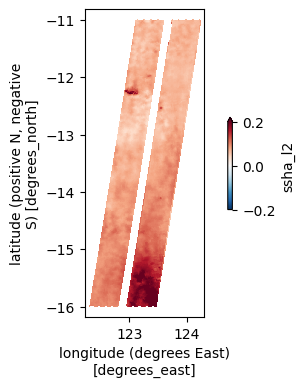

In [18]:
plot_karin(ds['ssha_l2'].mean(axis=0),vmin=-0.2, vmax=0.2)

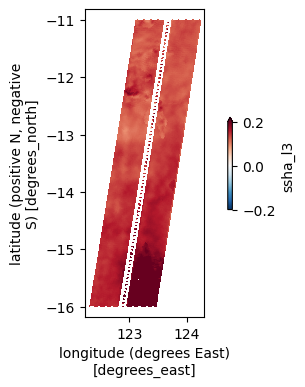

In [19]:
plot_karin(ds['ssha_l3'].mean(axis=0),vmin=-0.2, vmax=0.2)

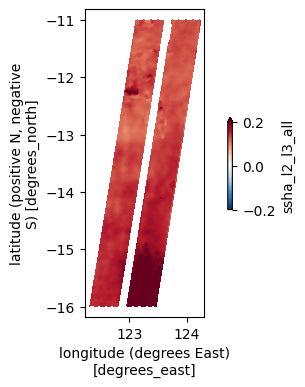

In [20]:
plot_karin(ds['ssha_l2_l3_all'].mean(axis=0),vmin=-0.2, vmax=0.2)

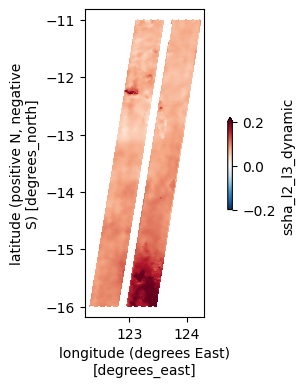

In [21]:
plot_karin(ds['ssha_l2_l3_dynamic'].mean(axis=0),vmin=-0.2, vmax=0.2)

In [24]:
#for cycle_no in range(474, 578):
cycle_no = 480

l2files = sorted(glob(f'/home/jupyter-mrayson/data/SWOT/l2_karin_v1_0/cycle_{cycle_no}/SWOT_L2_LR_SSH_Expert_*_0{pass_no}*.nc'))

l3files = sorted(glob(f'/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_{cycle_no}/*_0{pass_no}*.nc'))

if len(l2files)==0:
    print(cycle_no, ' no L2 file')
    #continue

if len(l3files)==0:
    print(cycle_no, ' no L3 file')
    #continue

In [27]:
ds_l2 = xr.open_dataset(l2files[0])
ds_l2

/home/jupyter-mrayson/.local/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/jupyter-mrayson/.local/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


<xarray.Dataset>
Dimensions:                                (num_lines: 9866, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 ...
    longitude                              (num_lines, num_pixels) float64 ...
    latitude_nadir                         (num_lines) float64 ...
    longitude_nadir                        (num_lines) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/98)
    time                                   (num_lines) datetime64[ns] ...
    time_tai                               (num_lines) datetime64[ns] ...
    ssh_karin                              (num_lines, num_pixels) float64 ...
    ssh_karin_qual                         (num_lines, num_pixels) float64 ...
    ssh_karin_uncert                       (num_lines, num_pixels) float32 ...
    ssha_karin                             (num_lines, num_pixels) float64 ...
    ...                                     ...
    swh_ssb_cor_source                     (num_lines, num_pixels) float32 ...
    swh_ssb_cor_source_2                   (num_lines, num_pixels) float32 ...
    wind_speed_ssb_cor_source              (num_lines, num_pixels) float32 ...
    wind_speed_ssb_cor_source_2            (num_lines, num_pixels) float32 ...
    volumetric_correlation                 (num_lines, num_pixels) float32 ...
    volumetric_correlation_uncert          (num_lines, num_pixels) float32 ...
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   JPL
    source:                                        Ka-band radar interferometer
    history:                                       2023-12-23T13:22:59Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       56.437089898941515
    ssha_variance:                                 0.0775838468412708
    references:                                    V1.2.1
    equator_longitude:                             125.32

(-16.0, -11.0)

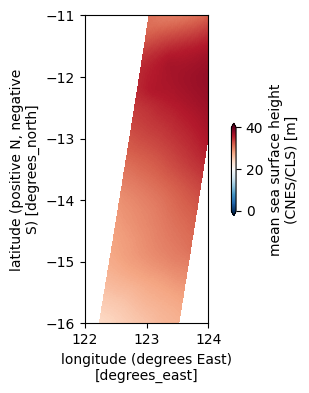

In [33]:
plot_karin(ds_l2['mean_sea_surface_cnescls'],vmax=40)
plt.xlim(122,124)
plt.ylim(-16,-11)

In [34]:
ds_l3 = xr.open_dataset(l3files[0])
ds_l3

<xarray.Dataset>
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 1323)
Coordinates:
    latitude              (num_lines, num_pixels) float64 ...
    longitude             (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines) datetime64[ns] ...
    mdt                   (num_lines, num_pixels) float64 ...
    ssha                  (num_lines, num_pixels) float64 ...
    ssha_noiseless        (num_lines, num_pixels) float64 ...
    ssha_unedited         (num_lines, num_pixels) float64 ...
    quality_flag          (num_lines, num_pixels) uint8 ...
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 ...
    vgosa                 (num_lines, num_pixels) float64 ...
    sigma0                (num_lines, num_pixels) float64 ...
    cross_track_distance  (num_pixels) float64 ...
    i_num_line            (num_nadir) int16 ...
    i_num_pixel           (num_nadir) int8 ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              41.756995
    geospatial_lon_max:              208.702964
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

(-16.0, -11.0)

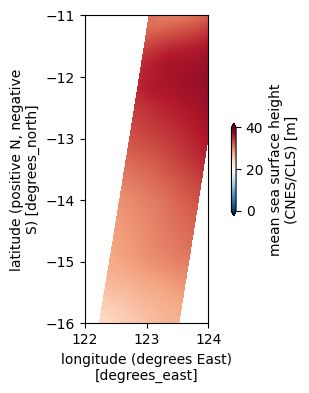

In [35]:
plot_karin(ds_l3['mss'],vmax=40)
plt.xlim(122,124)
plt.ylim(-16,-11)